# Wine Classifier (K-Means Clustering)

This is a simple wine classifier based on the `sklearn` wine dataset, which uses the K-means clustering algorithm as a form of unsupervised learning.

In [3]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

The dataset contains 13 numerical features, and a `target`, which is essentially a class of wine. The `target` can be 0, 1 or 2.

In [4]:
# Load the wine dataset
wine = load_wine(as_frame=True)
wine_df = wine.frame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Since we are performing unsupervised learning using K-means to simply observe patterns in the data, we don;t need the `target` column.

In [5]:
# Drop the target column
wine_df_unlabelled = wine_df.drop(columns=['target'])
wine_df_unlabelled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Now, most of our features are of different scales, thus we need to normalize them. We are using `StandardScaler` i.e. mean normalization here.

In [6]:
scaler = StandardScaler()
scaled_wine_df_unlabelled = pd.DataFrame(scaler.fit(wine_df_unlabelled).transform(wine_df_unlabelled), columns=wine_df_unlabelled.columns)
scaled_wine_df_unlabelled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Let us now use the elbow method to determine the optimal number of clusters for our data. Remember that we know the data can be classified into 3 classes (`target` values 0, 1 and 2).

In the elbow method, we loop through possible number of clusters, perform K-means clustering for each of them, and calculate the WCSS (Within Cluster Sum of Squares). WCSS is simply the sum of the squared distances of each point from its centroid. If we were to average WCSS i.e. divide by number of data points, we would get distortion/loss for this clustering.

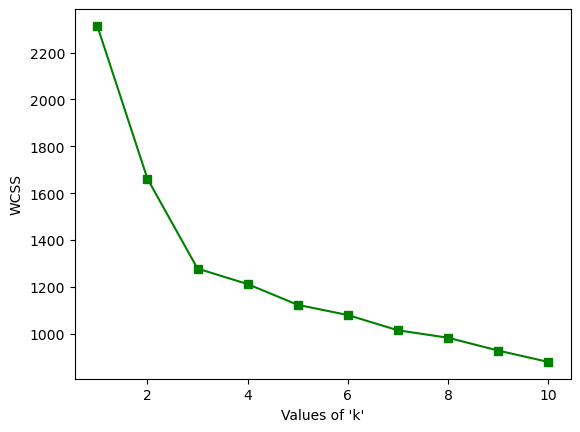

In [7]:
X = scaled_wine_df_unlabelled
wcss = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

We can see that the optimal number of clusters is 3, as expected. Now we can perform K-Means clustering using 3 clusters, and view the cluster centroids and sample labels.

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
print("Cluster centroids")
print(kmeans.cluster_centers_)
print()
print("Sample labels")
print(kmeans.labels_)

Cluster centroids
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]

Sample labels
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


 Recall that we had 13 features to be considered. We can actually utilize dimensionality reduction techniques such as PCA to reduce it to 2 dimensions (i.e. 2 features), while still capturing most of the variance in the data

In [9]:
pca = PCA(n_components=2)

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['Feature 1', 'Feature 2'])
reduced_X.head()
print(reduced_X)

# Reduce the cluster centroids
reduced_centers = pca.transform(kmeans.cluster_centers_)
print(reduced_centers)

print("Variance explained by each component:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

     Feature 1  Feature 2
0     3.316751   1.443463
1     2.209465  -0.333393
2     2.516740   1.031151
3     3.757066   2.756372
4     1.008908   0.869831
..         ...        ...
173  -3.370524   2.216289
174  -2.601956   1.757229
175  -2.677839   2.760899
176  -2.387017   2.297347
177  -3.208758   2.768920

[178 rows x 2 columns]
[[-0.03695661 -1.77223945]
 [-2.72003575  1.12565126]
 [ 2.2761936   0.93205403]]
Variance explained by each component: [0.36198848 0.1920749 ]
Total variance explained: 0.5540633835693528


c:\Users\2004e\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


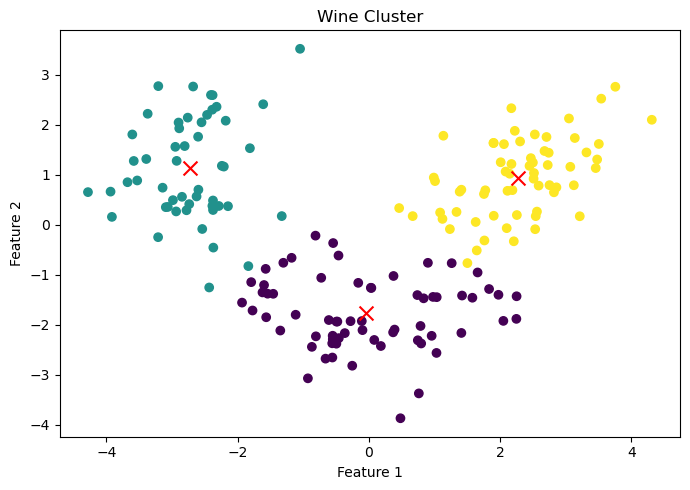

In [10]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['Feature 1'], reduced_X['Feature 2'], c=kmeans.labels_)
plt.scatter(reduced_centers[:,0], reduced_centers[:,1], marker='x', s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Cluster')
plt.tight_layout()

We can also plot a heatmap to visualise the contributions of the original features to our reduced features.

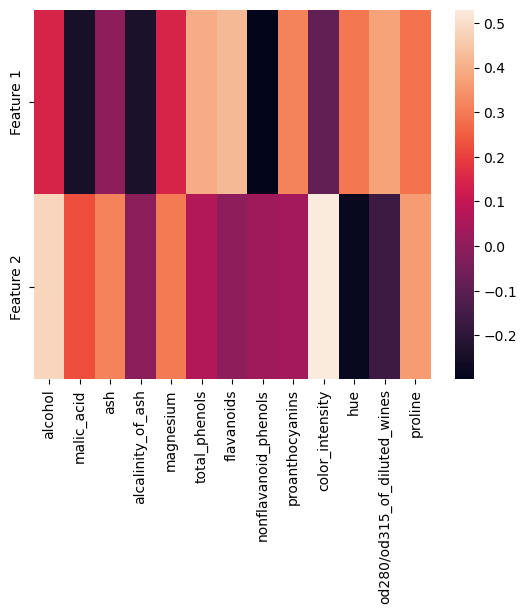

In [11]:
component_df = pd.DataFrame(pca.components_, index=["Feature 1","Feature 2"], columns=wine_df_unlabelled.columns)
# Heat map
sns.heatmap(component_df)
plt.show()

Let's connect how this heatmap relates to the scatter plot of clusters we saw earlier.

Remember in the scatter plot:
- Feature 1 was our x-axis (PCA1)
- Feature 2 was our y-axis (PCA2)

Looking at PCA1 (horizontal spread in scatter plot):
- Strong positive loadings (light colors) for alcohol, magnesium
- Strong negative loadings (dark colors) for proanthocyanins
- This means: When you move right in the scatter plot, you're seeing wines with:
  * Higher alcohol content and magnesium
  * Lower proanthocyanins
- The purple cluster on the right in the scatter plot likely represents wines with these characteristics

Looking at PCA2 (vertical spread in scatter plot):
- Most features have negative contributions (darker colors)
- Particularly strong negative loading for proline
- This means: When you move up in the scatter plot, you're seeing wines with:
  * Generally lower values across many features
  * Particularly lower proline content
- The teal cluster at the top-left likely represents wines with these characteristics

This helps us understand what makes each cluster unique:
- The purple cluster (right): High alcohol/magnesium, low proanthocyanins
- The teal cluster (top-left): Generally lower values across features
- The yellow cluster (middle-bottom): More moderate values

Remember though - we're only seeing ~55% of the total variance in these two components, so there's more to the story that we can't see in this 2D visualization!

Now, lets measure the accuracy of our clustering by comparing it with the actual labels.

In [12]:
label_to_class_map = {0: 1, 1: 2, 2: 0} # Assigning clusters to wine targets
print("Accuracy: {:.4f}".format((wine_df.target == pd.Series(kmeans.labels_).map(lambda l: label_to_class_map[l])).sum() / wine_df.target.shape[0]))


Accuracy: 0.9663
